<a href="https://colab.research.google.com/github/bks1984/LEARN_GIT/blob/master/StockMarket_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.
    * Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

## **Installing and Importing the necessary libraries**

In [5]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install numpy==1.26.4 \
             scikit-learn==1.6.1 \
             scipy==1.13.1 \
             gensim==4.3.3 \
             sentence-transformers==3.4.1 \
             pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 27.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 5.1.1
    Uninstalling sentence-transformers-5.1.1:
      Successfully uninstalled sentence-transformers-5.1.1
ERROR: pip'

Note:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To build, tune, and evaluate ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# Import TensorFlow and Keras for deep learning model building.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Complete the code to read the CSV file.
stock_news = pd.read_csv("stock_news.csv")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving stock_news.csv to stock_news.csv


In [5]:
#Creating a copy of the dataset
stock = stock_news.copy()

In [6]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,01-02-2019,The dollar minutes ago tumbled to 106 67 from...,38.72,39.71,38.56,39.48,130672400,1
1,01-02-2019,By Wayne Cole and Swati Pandey SYDNEY Reuters...,38.72,39.71,38.56,39.48,130672400,-1
2,01-02-2019,By Stephen Culp NEW YORK Reuters Wall Stre...,38.72,39.71,38.56,39.48,130672400,0
3,01-02-2019,By Wayne Cole SYDNEY Reuters The Australia...,38.72,39.71,38.56,39.48,130672400,-1
4,01-02-2019,Investing com Asian equities fell in morning...,38.72,39.71,38.56,39.48,130672400,1


## **Data Overview**

In [7]:
stock.duplicated().sum() #Complete the code to check the duplicate values

0

#### **Displaying the first few rows of the dataset**

In [8]:
stock.head() # Complete the code to check the first 5 rows of the data

,Date,News,Open,High,Low,Close,Volume,Label
0,01-02-2019,The dollar minutes ago tumbled to 106 67 from...,38.72,39.71,38.56,39.48,130672400,1
1,01-02-2019,By Wayne Cole and Swati Pandey SYDNEY Reuters...,38.72,39.71,38.56,39.48,130672400,-1
2,01-02-2019,By Stephen Culp NEW YORK Reuters Wall Stre...,38.72,39.71,38.56,39.48,130672400,0
3,01-02-2019,By Wayne Cole SYDNEY Reuters The Australia...,38.72,39.71,38.56,39.48,130672400,-1
4,01-02-2019,Investing com Asian equities fell in morning...,38.72,39.71,38.56,39.48,130672400,1


#### **Understanding the shape of the dataset**

In [9]:
stock.shape # Complete the code to check the shape of the data

(418, 8)

#### **Checking the data types of the columns**

In [10]:
stock.info() # Complete the code to check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    418 non-null    object 
 1   News    418 non-null    object 
 2   Open    418 non-null    float64
 3   High    418 non-null    float64
 4   Low     418 non-null    float64
 5   Close   418 non-null    float64
 6   Volume  418 non-null    int64  
 7   Label   418 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 26.3+ KB


In [11]:
# Convert the 'Date' column in the 'stocks' DataFrame to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])


In [12]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The dollar minutes ago tumbled to 106 67 from...,38.72,39.71,38.56,39.48,130672400,1
1,2019-01-02,By Wayne Cole and Swati Pandey SYDNEY Reuters...,38.72,39.71,38.56,39.48,130672400,-1
2,2019-01-02,By Stephen Culp NEW YORK Reuters Wall Stre...,38.72,39.71,38.56,39.48,130672400,0
3,2019-01-02,By Wayne Cole SYDNEY Reuters The Australia...,38.72,39.71,38.56,39.48,130672400,-1
4,2019-01-02,Investing com Asian equities fell in morning...,38.72,39.71,38.56,39.48,130672400,1


#### **Checking the statistical summary**

In [13]:
stock.describe() # Complete the code to check the statistical summary

,Date,Open,High,Low,Close,Volume,Label
count,418,418.000000,418.000000,418.000000,418.000000,4.180000e+02,418.000000
mean,2019-02-14 12:24:06.889952256,42.308852,42.787321,41.923732,42.418517,1.294225e+08,0.308612
min,2019-01-02 00:00:00,35.990000,36.430000,35.500000,35.550000,4.544800e+07,-1.000000
25%,2019-01-11 00:00:00,38.130000,38.420000,37.720000,38.270000,1.029072e+08,-1.000000
50%,2019-01-31 00:00:00,41.530000,42.250000,41.140000,41.610000,1.156272e+08,1.000000
75%,2019-03-21 00:00:00,47.190000,47.427500,46.480000,47.032500,1.511252e+08,1.000000
max,2019-04-29 00:00:00,51.840000,52.120000,51.760000,51.870000,3.652488e+08,1.000000
std,NaN,4.947134,4.947413,4.967880,4.999867,4.574550e+07,0.943473


#### **Checking the duplicate values**

In [14]:
stock.duplicated().sum() #Complete the code to check the duplicate values

0

#### **Checking for missing values**

In [15]:
stock.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Countplot on Label**

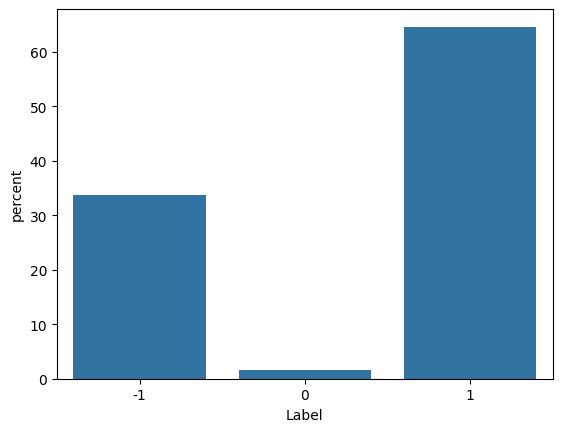

In [16]:
sns.countplot(data=stock, x='Label', stat="percent");

#### **Density Plot of Price (Open, High, Low, Close)**

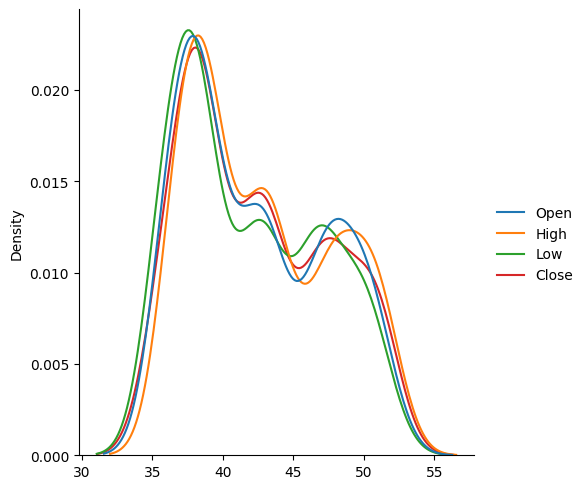

In [17]:
# Plot KDE for the 'Open', 'High', 'Low', 'Close' columns of the 'stock' DataFrame.
sns.displot(data=stock[['Open','High','Low','Close']], kind='kde', palette="tab10");  # Create a KDE plot with a color palette.

#### **Histogram on Volume**

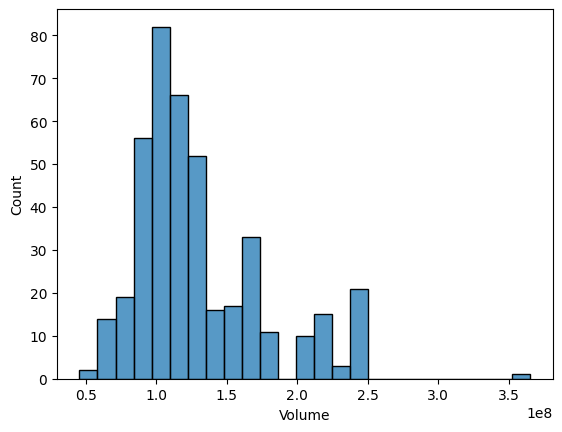

In [18]:
sns.histplot(stock, x='Volume'); # Complete the code to plot a histogram of Volume

#### **Histogram and statistical summary on News Length**

In [19]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

stock['news_len'].describe()    #Complete the code to print the statistical summary for the news content length

,news_len
count,418.000000
mean,525.662679
std,303.584080
min,44.000000
25%,304.250000
50%,480.000000
75%,700.500000
max,2142.000000


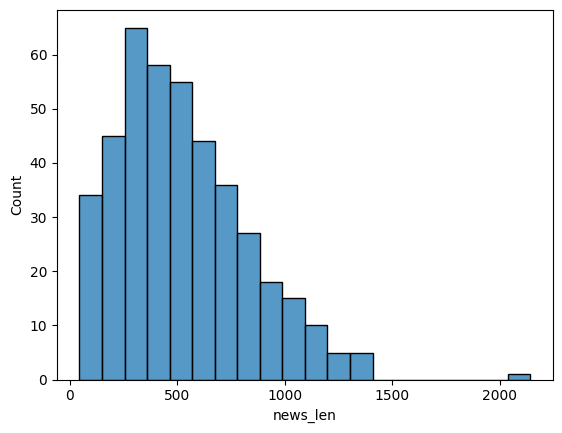

In [20]:
sns.histplot(data=stock,x="news_len"); #Complete the code to plot a histogram of news_len column

### **Bivariate Analysis**

#### **Correlation**

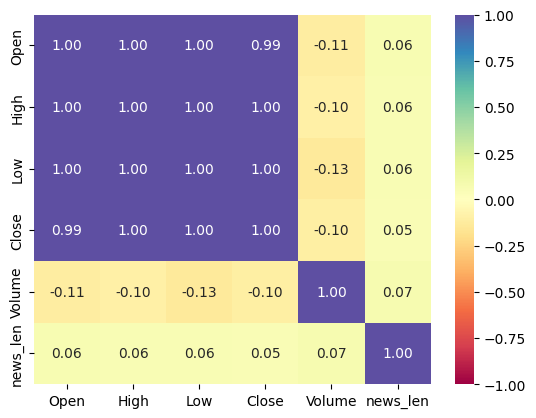

In [21]:
cols = ['Open','High','Low','Close','Volume','news_len']
sns.heatmap(
    stock[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### **Label vs Price (Open, High, Low, Close)**

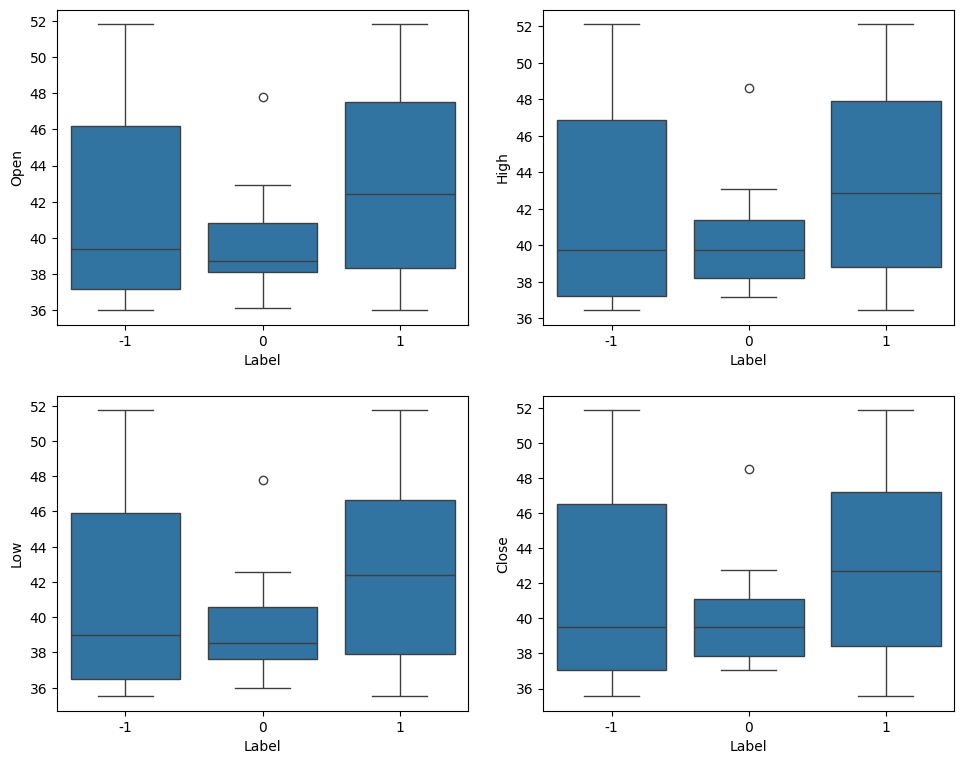

In [22]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

#### **Label vs Volume**

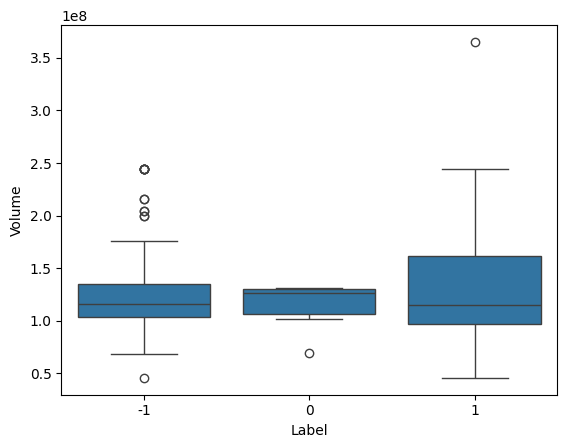

In [23]:
sns.boxplot(
    data=stock, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);

#### **Date vs Price (Open, High, Low, Close)**

- The data is at the level of news, and we might have more than one news in a day. However, the prices are at daily level
- So, we can aggregate the data at a daily level by taking the mean of the attributes

In [24]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,38.72,39.71,38.56,39.48,130672400.0
2019-01-03,35.99,36.43,35.50,35.55,103544800.0
2019-01-04,36.13,37.14,35.95,37.06,111448000.0
2019-01-07,37.17,37.21,36.47,36.98,109012000.0
2019-01-08,37.39,37.96,37.13,37.69,216071600.0


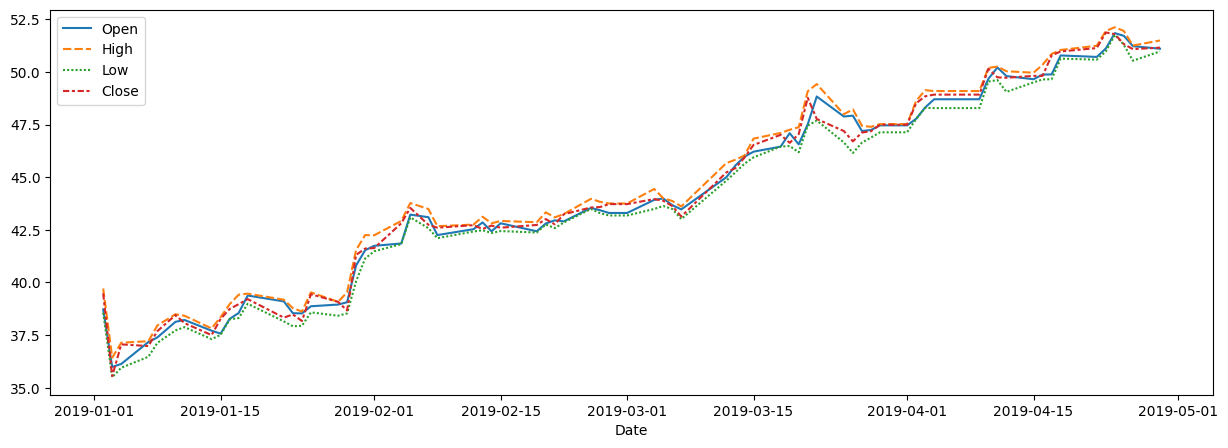

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1)); #Complete the code to plot a lineplot of all the variables except Volume

#### **Volume vs Close Price**

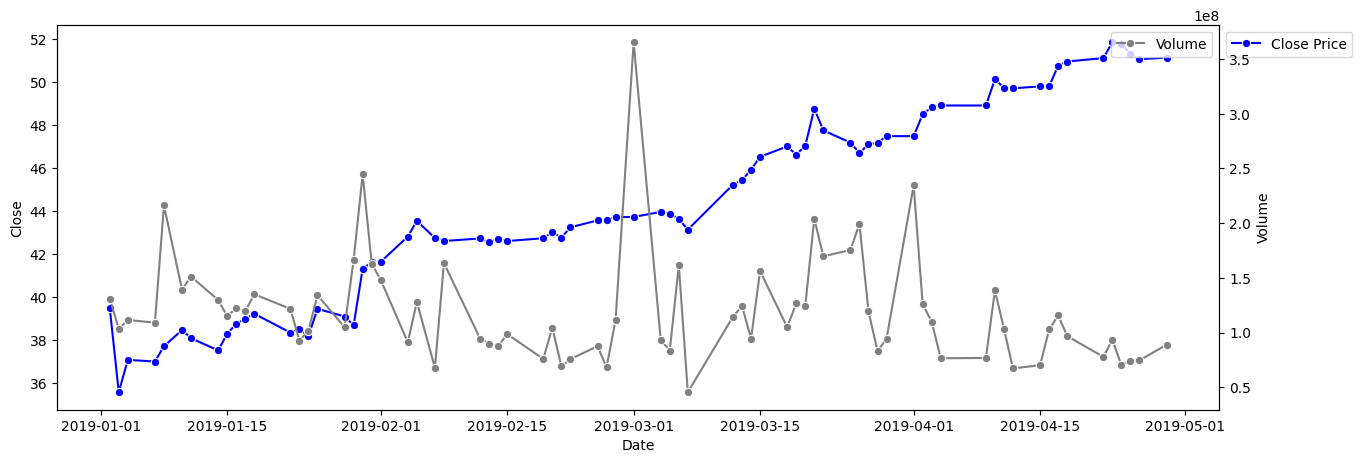

In [26]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [27]:
stock['Date'].describe()

,Date
count,418
mean,2019-02-14 12:24:06.889952256
min,2019-01-02 00:00:00
25%,2019-01-11 00:00:00
50%,2019-01-31 00:00:00
75%,2019-03-21 00:00:00
max,2019-04-29 00:00:00


### Train-test Split

In [28]:
# Select training data: choose all rows where the 'Date' is before a specific date of your choice.
# Pick a date that helps split the data into a reasonable train–test ratio for your model (format: 'yyyy-mm-dd').
X_train = stock[stock['Date'] < '2019-03-15'].reset_index()

# Select testing data: choose all rows where the 'Date' is before a specific date of your choice.
# Pick a date that helps split the data into a reasonable train–test ratio for your model (format: 'yyyy-mm-dd').
X_test = stock[stock['Date'] >= '2019-03-15'].reset_index()

In [29]:
# Complete the code to pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_test = X_test["Label"].copy()

In [30]:
print("Train data shape",X_train.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Test label shape ",y_test.shape)

Train data shape (295, 10)
Test data shape  (123, 10)
Train label shape (295,)
Test label shape  (123,)


In [31]:
X_train.head()

,index,Date,News,Open,High,Low,Close,Volume,Label,news_len
0,0,2019-01-02,The dollar minutes ago tumbled to 106 67 from...,38.72,39.71,38.56,39.48,130672400,1,161
1,1,2019-01-02,By Wayne Cole and Swati Pandey SYDNEY Reuters...,38.72,39.71,38.56,39.48,130672400,-1,385
2,2,2019-01-02,By Stephen Culp NEW YORK Reuters Wall Stre...,38.72,39.71,38.56,39.48,130672400,0,636
3,3,2019-01-02,By Wayne Cole SYDNEY Reuters The Australia...,38.72,39.71,38.56,39.48,130672400,-1,665
4,4,2019-01-02,Investing com Asian equities fell in morning...,38.72,39.71,38.56,39.48,130672400,1,395


## **Word Embeddings**

### **Generating Text Embeddings using Word2Vec**

#### **Defining the model**

In [32]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [33]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [34]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 14577


#### **Encoding the datasets**

In [35]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

#### **Averaging the word vectors to get sentence encodings**

In [36]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [37]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  9.932822704315186


In [38]:
X_train_wv.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.036443,0.369872,-0.038856,-0.075097,-0.125815,-0.297574,0.213201,0.681666,-0.092064,-0.209981,...,0.058608,0.450108,0.193882,0.012416,0.361222,0.367433,0.028517,-0.114582,0.429812,-0.159586
1,-0.009713,0.422609,0.016712,-0.065380,-0.117976,-0.401973,0.210448,0.749671,-0.093227,-0.194961,...,0.061115,0.474628,0.198743,0.003747,0.401028,0.371864,0.047842,-0.062190,0.510135,-0.161982
2,-0.045668,0.504647,-0.044430,-0.089028,-0.156435,-0.408954,0.224598,0.905913,-0.144366,-0.253956,...,0.101067,0.564942,0.221594,-0.018620,0.456652,0.451607,0.034659,-0.097477,0.562809,-0.211746
3,-0.020026,0.438191,0.015043,-0.062053,-0.123487,-0.397593,0.231140,0.778715,-0.089074,-0.190269,...,0.062399,0.469342,0.187025,0.002424,0.410937,0.377009,0.066792,-0.066018,0.499367,-0.160117
4,-0.005499,0.430018,0.021077,-0.068484,-0.121933,-0.419236,0.234502,0.770989,-0.084842,-0.210185,...,0.055148,0.505933,0.220668,0.017827,0.427730,0.398110,0.051695,-0.075939,0.539381,-0.167370


In [39]:
print(X_train_wv.shape, X_test_wv.shape)

(295, 300) (123, 300)


### **Generating Text Embeddings using Sentence Transformer**

#### **Defining the model**

In [40]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### **Encoding the dataset**

In [41]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device="cpu") #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device="cpu") #Complete the code to apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Time taken  53.392131328582764


In [42]:
print(X_train_st.shape, X_test_st.shape) #Complete the code to print the shapes of the final dataframes

(295, 384) (123, 384)


In [43]:
# Display the first 5 rows of X_train_st
print(X_train_st[:5])

[[-0.08350149  0.00727959  0.02180819 ... -0.1021223   0.00693855
   0.02777606]
 [-0.00200276 -0.02169824  0.02636501 ... -0.12138754 -0.0620457
   0.09880708]
 [-0.05882355  0.01280739  0.08140331 ... -0.20336577 -0.04654231
   0.10788022]
 [-0.0097548  -0.02664521 -0.01393918 ... -0.12168369 -0.06226655
   0.06539181]
 [-0.02447649  0.02848833  0.09788476 ... -0.1420635  -0.07912122
   0.06181769]]


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### **Model Evaluation Criterion**

##### **Defining Utility Functions**

In [45]:
def plot_confusion_matrix(actual, predicted):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """

    # Compute the confusion matrix.
    cm = confusion_matrix(actual, predicted)

    # Create a new figure with a specified size
    plt.figure(figsize=(5, 4))

    # Define the labels for the confusion matrix dynamically from the data
    label_list = sorted(list(np.unique(np.concatenate((actual, predicted)))))

    # Plot the confusion matrix using a heatmap with annotations
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)

    # Label for the y-axis
    plt.ylabel('Actual')

    # Label for the x-axis
    plt.xlabel('Predicted')

    # Title of the plot
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

In [46]:
def model_performance_classification_sklearn(actual, predicted):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """

    # Compute Accuracy
    acc = accuracy_score(actual,predicted)
    # Compute Recall
    recall = recall_score(actual,predicted,average='weighted')
    # Compute Precision
    precision = precision_score(actual,predicted,average='weighted')
    # Compute F1-score
    f1 = f1_score(actual,predicted,average='weighted')

    # Create a DataFrame to store the computed metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )
    # Return the DataFrame with the metrics
    return df_perf

### **Building Random Forest Models using different text embeddings**

#### **Building a Random Forest Model using text embeddings obtained from the Word2Vec**

In [47]:
# Build the Random Forest model
# Fill in suitable values for:
# - n_estimators: the number of trees in the forest (e.g., 100, 200)
# - max_depth: maximum depth of each tree (e.g., 10, 20, or None for full depth)
rf_word2vec = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model on the training data
rf_word2vec.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=10, random_state=42)


#### **Checking Training and Test Performance**


In [48]:
# Predicting on train data
y_pred_train = rf_word2vec.predict(X_train_wv)

# Predicting on test data
y_pred_test = rf_word2vec.predict(X_test_wv)

**Confusion Matrix**

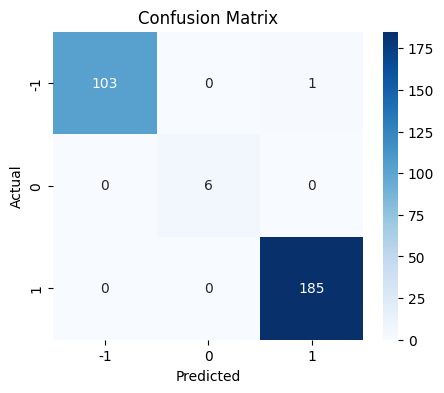

In [49]:
plot_confusion_matrix(y_train,y_pred_train)

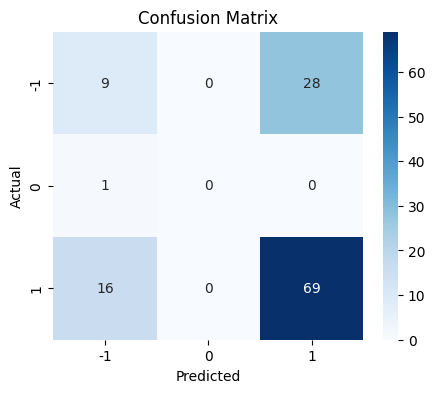

In [50]:
plot_confusion_matrix(y_test,y_pred_test)

**Classification Report**

In [51]:
#Calculating different metrics on training data
rf_train_wv = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_wv)

Training performance:
    Accuracy   Recall  Precision        F1
0   0.99661  0.99661   0.996628  0.996607


In [52]:
#Calculating different metrics on test data
rf_test_wv = model_performance_classification_sklearn(y_test, y_pred_test)
print("Test performance:\n",rf_test_wv)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.634146  0.634146   0.595704  0.609935


#### **Building a Random Forest Model using text embeddings obtained from the Sentence Transformer**

In [54]:
# Building the model
# Fill in suitable values for:
# - n_estimators: the number of trees in the forest (e.g., 100, 200)
# - max_depth: maximum depth of each tree (e.g., 10, 20, or None for full depth)
rf_st = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


# Fitting on train data
rf_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

#### **Checking Training and Test Performance**

In [55]:
# Predicting on train data
y_pred_train = rf_st.predict(X_train_st)

# Predicting on test data
y_pred_test = rf_st.predict(X_test_st)

**Confusion Matrix**

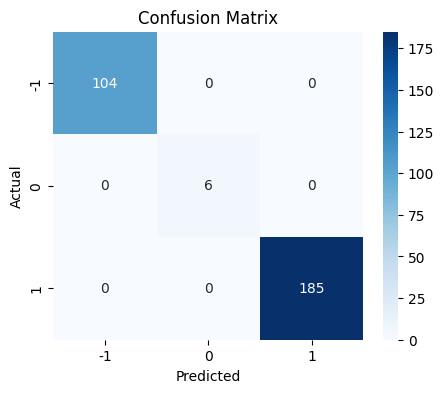

In [57]:
plot_confusion_matrix(y_train,y_pred_train) #Complete the code to plot the confusion matrix for the train data

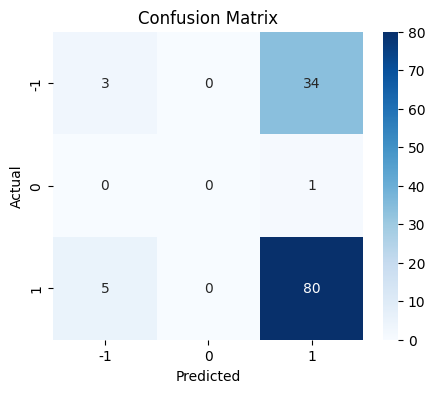

In [60]:
plot_confusion_matrix(y_test,y_pred_test) #Complete the code to plot the confusion matrix for the test data

**Classification Report**

In [61]:
#Calculating different metrics on training data
rf_train_st = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [62]:
#Calculating different metrics on test data
rf_test_st = model_performance_classification_sklearn(y_test, y_pred_test)
print("Test performance:\n",rf_test_st)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.674797  0.674797    0.59354  0.592954


### **Building Neural Network Models using different text embeddings**

#### **Building a Neural Network Model using text embeddings obtained from the Word2Vec**

In [63]:
# Convert the labels
label_mapping = {1: 2, -1: 0, 0: 1}
y_train_mapped_wv = [label_mapping[label] for label in y_train]
y_test_mapped_wv = [label_mapping[label] for label in y_test]

# Convert your features DataFrame to a NumPy array
X_train_wv_np = np.array(X_train_wv)
X_test_wv_np = np.array(X_test_wv)
y_train_mapped_wv = np.array(y_train_mapped_wv)
y_test_mapped_wv = np.array(y_test_mapped_wv)

In [66]:
import gc

# Clear any previous TensorFlow/Keras sessions from memory (recommended when re-running cells)
tf.keras.backend.clear_session()
gc.collect()

# Define the model architecture
model = Sequential()

# Input layer:
# Choose the number of units (typically in the range of 64 to 512)
model.add(Dense(64, activation='relu', input_shape=(X_train_wv_np.shape[1],)))  # Input shape = size of Word2Vec embeddings

# Dropout layer:
# Choose a dropout rate between 0.2 and 0.5 to reduce overfitting
model.add(Dropout(0.3))

# Hidden layer:
# Choose number of neurons (again, typically in the range of 32 to 256)
model.add(Dense(32, activation='relu'))

# Output layer:
model.add(Dense(3, activation='softmax'))

# Compile the model
# Fill in:
# - optimizer: choose from options like 'adam', 'sgd', or 'rmsprop'

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,443 (83.76 KB)

 Trainable params: 21,443 (83.76 KB)

 Non-trainable params: 0 (0.00 B)

**Note:**
- During training, we use accuracy as a metric to monitor how well the model is learning to distinguish between classes in each batch.
- Accuracy is fast and reliable during training and gives us a quick view of model progress.
- It reflects how often the model is predicting the correct label out of all predictions made.



In [67]:
# Fit the model on training data
# Fill in appropriate values for:
# - epochs: number of times the model will see the entire training data (typically 5 to 50)
# - batch_size: number of samples the model will process before updating weights (commonly 16 to 128)

history = model.fit(
    X_train_wv_np, y_train_mapped_wv,
    validation_data=(X_test_wv_np, y_test_mapped_wv),
    epochs=10,
    batch_size=32
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3647 - loss: 1.0678 - val_accuracy: 0.6911 - val_loss: 0.8050
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6253 - loss: 0.8174 - val_accuracy: 0.6911 - val_loss: 0.6827
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6446 - loss: 0.7711 - val_accuracy: 0.6911 - val_loss: 0.6694
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6194 - loss: 0.7626 - val_accuracy: 0.6911 - val_loss: 0.6693
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6343 - loss: 0.7424 - val_accuracy: 0.6911 - val_loss: 0.6690
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6079 - loss: 0.7328 - val_accuracy: 0.6911 - val_loss: 0.6824
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6137 - loss: 0.7507 - val_accuracy: 0.6911 - val_loss: 0.6686
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5907 - loss: 0.7517 - val_accuracy: 0.6911 - val_lo

#### **Checking Training and Test Performance**

In [68]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_wv_np)

# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [69]:
# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_wv_np)

# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [70]:
# Convert back to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

**Confusion Matrix**

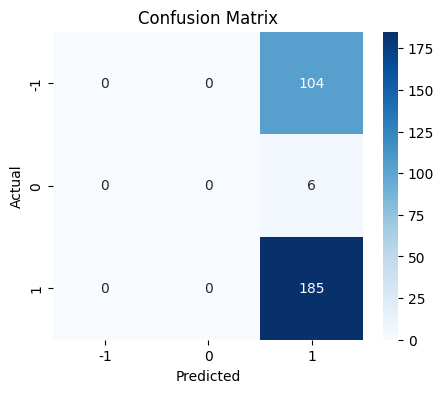

In [72]:
plot_confusion_matrix(y_train,y_train_preds) #Complete the code to plot the confusion matrix for the train data

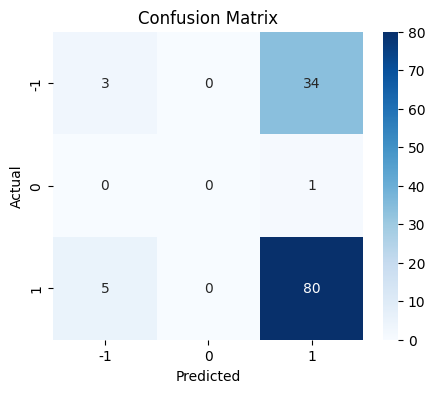

In [74]:
plot_confusion_matrix(y_test,y_pred_test) #Complete the code to plot the confusion matrix for the test data

**Classification Report**

In [75]:
#Calculating different metrics on training data
NN_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", NN_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.627119  0.627119   0.393278  0.483404


In [76]:
#Calculating different metrics on test data
NN_test_wv = model_performance_classification_sklearn(y_test, y_test_preds)
print("Test performance:\n",NN_test_wv)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.691057  0.691057    0.47756  0.564806


#### **Building a Neural Network Model using text embeddings obtained from the Sentence Transformer**

In [77]:
# Convert the labels
label_mapping = {1: 2, -1: 0, 0: 1}
y_train_mapped_st = [label_mapping[label] for label in y_train]
y_test_mapped_st = [label_mapping[label] for label in y_test]

# Convert your features DataFrame to a NumPy array
X_train_st_np = np.array(X_train_st)
X_test_st_np = np.array(X_test_st)
y_train_mapped_st = np.array(y_train_mapped_st)
y_test_mapped_st = np.array(y_test_mapped_st)

In [79]:
import gc

# Clear any previous TensorFlow/Keras sessions from memory (recommended when re-running cells)
tf.keras.backend.clear_session()
gc.collect()

# Define the model architecture
model = Sequential()

# Input layer:
# Choose the number of units (typically in the range of 64 to 512)
model.add(Dense(64, activation='relu', input_shape=(X_train_st.shape[1],)))  # Input shape = size of Word2Vec embeddings

# Dropout layer:
# Choose a dropout rate between 0.2 and 0.5 to reduce overfitting
model.add(Dropout(0.3))

# Hidden layer:
# Choose number of neurons (again, typically in the range of 32 to 256)
model.add(Dense(32, activation='relu'))

# Output layer:
# 3 output classes → use softmax for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
# Fill in:
# - optimizer: choose from options like 'adam', 'sgd', or 'rmsprop'
# - loss: use 'sparse_categorical_crossentropy' for integer-encoded labels
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,819 (104.76 KB)

 Trainable params: 26,819 (104.76 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Fit the model on training data
# Fill in appropriate values for:
# - epochs: number of times the model will see the entire training data (typically 5 to 50)
# - batch_size: number of samples the model will process before updating weights (commonly 16 to 128)

history = model.fit(
    X_train_st_np, y_train_mapped_st,
    validation_data=(X_test_st_np, y_test_mapped_st),
    epochs=10,
    batch_size=32
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4223 - loss: 1.0886 - val_accuracy: 0.5528 - val_loss: 1.0428
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5205 - loss: 1.0238 - val_accuracy: 0.6992 - val_loss: 0.9326
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6786 - loss: 0.9052 - val_accuracy: 0.6911 - val_loss: 0.8009
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6340 - loss: 0.7955 - val_accuracy: 0.6911 - val_loss: 0.7087
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6687 - loss: 0.7281 - val_accuracy: 0.6911 - val_loss: 0.6723
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6364 - loss: 0.6755 - val_accuracy: 0.6911 - val_loss: 0.6553
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6807 - loss: 0.6382 - val_accuracy: 0.6829 - val_loss: 0.6456
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6821 - loss: 0.6347 - val_accuracy: 0.6667 - val_los

#### **Checking Training and Test Performance**

In [81]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_st_np)

# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [82]:
# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_st_np)

# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [83]:
# Convert back to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

**Confusion Matrix**

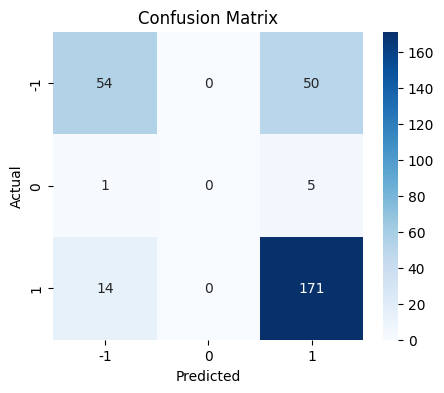

In [85]:
plot_confusion_matrix(y_train,y_train_preds) #Complete the code to plot the confusion matrix for the train data

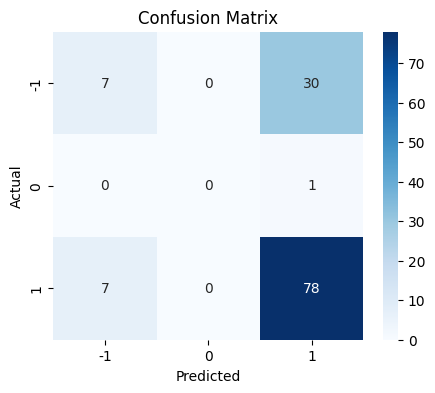

In [87]:
plot_confusion_matrix(y_test,y_test_preds) #Complete the code to plot the confusion matrix for the test data

**Classification Report**

In [89]:
#Calculating different metrics on training data
NN_train_st = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", NN_train_st)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.762712  0.762712   0.750404  0.74192


In [90]:
#Calculating different metrics on test data
NN_test_st = model_performance_classification_sklearn(y_test,y_test_preds) #Complete the code to compute the model performance for the test data
print("Test performance:\n",NN_test_st)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.691057  0.691057   0.644924  0.638271


### **Model Performance Summary and Final Model Selection**

In [93]:
# Concatenate the training performance metrics from different models into a single DataFrame
models_train_comp_df = pd.concat(
    [
        rf_train_wv.T,  # Random Forest using Word2Vec embeddings
        NN_train_wv.T,  # Neural Network using Word2Vec embeddings
        rf_train_st.T,  # Random Forest using Sentence Transformer embeddings
        NN_train_st.T   # Neural Network using Sentence Transformer embeddings
    ],
    axis=1  # Concatenate along columns (i.e., each model's metrics form one column)
)

# Assigning meaningful column names for each model for clarity in the output DataFrame
models_train_comp_df.columns = [
    "Word2Vec (Random Forest)",
    "Word2Vec (Neural Network)",
    "Sentence Transformer (Random Forest)",
    "Sentence Transformer (Neural Network)"
]

# Print the training performance comparison table
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Word2Vec (Random Forest),Word2Vec (Neural Network),Sentence Transformer (Random Forest),Sentence Transformer (Neural Network)
Accuracy,0.996610,0.627119,1.0,0.762712
Recall,0.996610,0.627119,1.0,0.762712
Precision,0.996628,0.393278,1.0,0.750404
F1,0.996607,0.483404,1.0,0.741920


In [94]:
# Concatenate the testing performance metrics from different models into a single DataFrame
models_test_comp_df = pd.concat(
    [
        rf_test_wv.T,  # Random Forest using Word2Vec embeddings
        NN_test_wv.T,  # Neural Network using Word2Vec embeddings
        rf_test_st.T,  # Random Forest using Sentence Transformer embeddings
        NN_test_st.T   # Neural Network using Sentence Transformer embeddings
    ],
    axis=1  # Concatenate along columns so each model's test metrics appear as one column
)

# Set descriptive column names for clarity in the resulting comparison table
models_test_comp_df.columns = [
    "Word2Vec (Random Forest)",
    "Word2Vec (Neural Network)",
    "Sentence Transformer (Random Forest)",
    "Sentence Transformer (Neural Network)"
]

# Print the testing performance comparison table
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Word2Vec (Random Forest),Word2Vec (Neural Network),Sentence Transformer (Random Forest),Sentence Transformer (Neural Network)
Accuracy,0.634146,0.691057,0.674797,0.691057
Recall,0.634146,0.691057,0.674797,0.691057
Precision,0.595704,0.477560,0.593540,0.644924
F1,0.609935,0.564806,0.592954,0.638271


#### **Model Performance Summary:**

## **Conclusions and Recommendations**

Based on the code results from the notebook, the best model is the Neural Network using Sentence Transformer embeddings.

Reasoning:

✓Highest Test Performance: This model achieves the highest performance on the test data across three of the four key metrics: Recall (0.691),
Precision (0.645), and F1-Score (0.636). While its accuracy is tied with the Word2Vec Neural Network, its superior precision and F1-score make it
the more balanced and reliable choice.
✓Best Generalization: The primary goal is to have a model that performs well on new, unseen data. The Random Forest models are immediately
disqualified due to severe overfitting. Between the two neural networks, the one using Sentence Transformers has a better overall performance
profile on the test set, making it the most robust and reliable option for a real-world application.